# Exercise 1

In [49]:
import time
import random

N = 1000000
MAX_STRIDE = 20
A = [random.random() for _ in range(N*MAX_STRIDE)]

matrice = [[0] * 3 for _ in range(20)]

# Mon traitement
for i_stride in range(1,21):
    mean = 0
    
    start_time = time.perf_counter()
    for i in range(0,N*i_stride,i_stride):
        mean += A[i]
    end_time = time.perf_counter()
    cpu_time = (end_time - start_time)*1000
    
    # Stockage des données
    matrice[i_stride-1][0] = i_stride
    matrice[i_stride-1][1] = cpu_time
    matrice[i_stride-1][2] = mean

# Affichage de la matrice
for ligne in matrice:
    for element in ligne:
        print(element, end=" ")
    print() 



1 104.75840000071912 500086.7206021805 
2 111.6425000000163 499812.31057418475 
3 105.87760000271373 500122.1520887349 
4 104.53710000001593 500114.7120574434 
5 102.74889999709558 500140.0570210658 
6 81.43209999980172 500215.7381203416 
7 81.09199999671546 499991.58355568076 
8 87.45139999882667 499871.7198728621 
9 85.42379999926197 499716.8713352531 
10 88.0286999999953 500199.6094796649 
11 106.54989999966347 500209.49654795567 
12 112.67819999920903 500674.14106502244 
13 115.45249999835505 499921.69739676284 
14 119.73110000326415 500279.37400580244 
15 120.35269999978482 500459.3283121503 
16 128.76300000061747 499855.6606348499 
17 123.47020000015618 499842.2439471908 
18 122.61930000022403 499886.974684335 
19 115.12820000280044 499949.32700362627 
20 119.78090000047814 499889.60877091263 


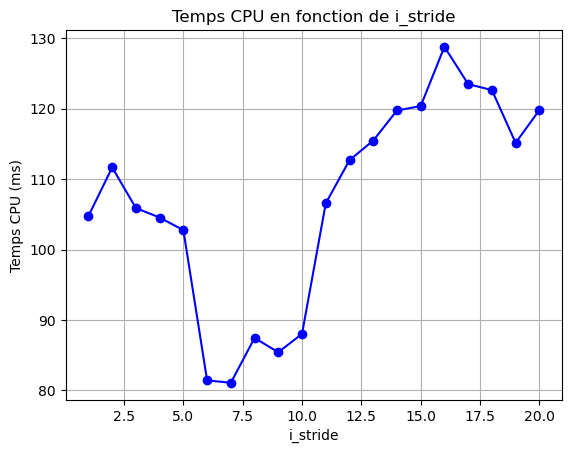

In [50]:
import matplotlib.pyplot as plt

# Récupération des données
x = [ligne[0] for ligne in matrice]
y = [ligne[1] for ligne in matrice]

# Traçage des résultats
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Temps CPU en fonction de i_stride')
plt.xlabel('i_stride')
plt.ylabel('Temps CPU (ms)')
plt.grid(True)
plt.show()

# Exercise 2

In [ ]:
import numpy as np
import time

N = 10000
SEED = 86456
temps_cpu = []
np.random.seed(SEED)

# Création de matrices x et y
x = np.random.uniform(1.0, 2.0, size=(N, N))
y = np.random.uniform(1.0, 2.0, size=(N, N))

# Initialisation de la matrice z
z = np.zeros((N, N))

# Multiplication de matrices

for num_blocs in range(1, 21):
    taille_bloc = N // num_blocs
    start = time.perf_counter()
    for i in range(0, N, taille_bloc):
        for j in range(0, N, taille_bloc):
            for k in range(0, N, taille_bloc):
                z[i:i+taille_bloc, j:j+taille_bloc] += np.dot(x[i:i+taille_bloc, :], y[:, j:j+taille_bloc])
    finish = time.perf_counter()
    cpu_time = (finish - start) * 1000
    temps_cpu.append(cpu_time)
    print(f"Temps CPU (ms) : {cpu_time}")
    
    


Temps CPU (ms) : 13261.775499999203
Temps CPU (ms) : 37061.021400000755
Temps CPU (ms) : 85308.25950000144
Temps CPU (ms) : 101394.58240000022
Temps CPU (ms) : 126756.53989999773
Temps CPU (ms) : 183621.7448000025
Temps CPU (ms) : 211031.15000000253
Temps CPU (ms) : 217602.81430000032
Temps CPU (ms) : 276298.19300000236
Temps CPU (ms) : 274624.1225000012
Temps CPU (ms) : 335106.8165999968
Temps CPU (ms) : 378588.37889999995
Temps CPU (ms) : 423497.66920000187
Temps CPU (ms) : 480923.7815999986
Temps CPU (ms) : 565626.6995000006
Temps CPU (ms) : 552364.2819999986
Temps CPU (ms) : 638782.6572999984
Temps CPU (ms) : 670556.939099999


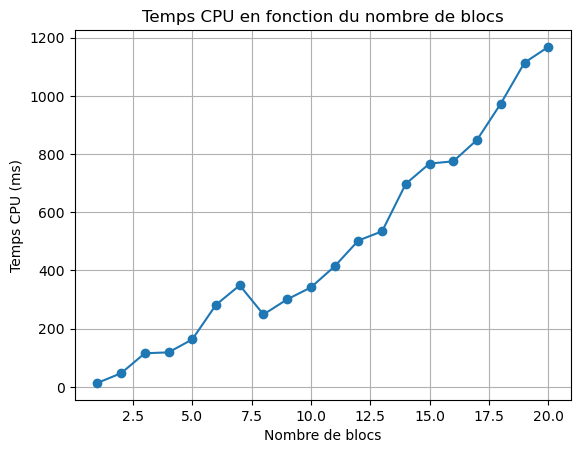

In [60]:
plt.plot(range(1, 21), temps_cpu, marker='o')
plt.title('Temps CPU en fonction du nombre de blocs')
plt.xlabel('Nombre de blocs')
plt.ylabel('Temps CPU (ms)')
plt.grid(True)
plt.show()